In [62]:
# Подготовка базы данных

from pandas import read_csv
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
filename = "data_18.csv"
Data = read_csv('data_18.csv', sep=';', decimal=',', header=None)
Data

,0,1,2,3,4
0,-3.50288499791274,3.567188207805574,7.175763232047986,-6.137684018181603,3.0785797363887286
1,3.7697591116523292,-4.080370319573766,5.666447854309314,5.860447750929639,-6.702406514009883
2,-2.9736263973088706,4.242004821637716,6.476903148117882,-6.542950569429392,3.2105767533668277
3,4.956912578152227,4.77381346110107,11.115045296336254,-4.723439680751831,-9.261448367688635
4,1.53902180349017,6.974209328577278,4.329979677884614,-9.632529888561027,-8.059445198895578
5,-3.79322506687983,4.6681528612301655,7.728083010008946,-6.89401455022115,2.8176626345799556
6,-4.237401026384398,3.670448270382708,7.223687345958128,-5.164579667310896,2.8874313404599863
7,4.034411518459781,-3.1464895503297785,5.353987472778065,5.370881279416701,-5.35787830403168
8,4.766647023029745,3.2720149539735486,9.589323647713954,-4.189364791819478,-9.988799366972028
9,-4.390889946105257,3.6045828241546993,7.961738891214496,-5.9708716054483295,4.362204139421741


In [104]:
# Кластериазция методом K-means.

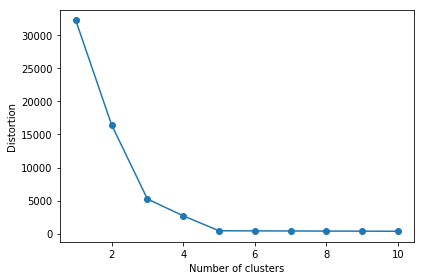

In [107]:
# Метод локтя для определения оптимального числа кластеров.

from IPython.display import Image
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,
               init='k-means++',
               n_init=10,
               max_iter=300,
               random_state=0)
    km.fit(Data)
    distortions.append(km.inertia_)
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel("Distortion")
plt.tight_layout()
plt.show()

# Основываясь на методе локтя, подходящими могут быть модели с количеством 3, 4 и 5 кластеров.
# Построим эти модели и сравним их на основе сумме квадатов расстояния между кластерами.

In [108]:
km3 = KMeans(n_clusters=3,
           init='random',
           n_init=5,
           max_iter=1000,
           tol=1e-04)

km3_Data= km3.fit_predict(Data)
km3_Data

array([0, 1, 0, 2, 2, 0, 0, 1, 2, 0, 0, 1, 0, 0, 1, 2, 2, 1, 2, 2, 2, 0,
       1, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1, 1, 2, 0, 0, 0, 2, 0, 1,
       1, 0, 2, 2, 1, 2, 0, 2, 1, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 2, 2, 0, 1, 2, 2, 2, 2, 2, 1,
       0, 2, 2, 1, 0, 1, 0, 0, 2, 0, 2, 0, 1, 0, 0, 1, 2, 0, 0, 2, 0, 0,
       2, 0, 0, 0, 2, 2, 1, 1, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 1, 1, 0, 1,
       2, 2, 1, 0, 2, 0, 2, 1, 2, 1, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 1, 0,
       0, 2, 2, 1, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 1, 1,
       2, 0, 1, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       2, 2, 1, 2, 0, 0, 2, 2, 0, 2, 1, 2, 2, 1, 0, 0, 2, 0, 1, 1, 1, 2,
       0, 0, 0, 2, 0, 2, 2, 0, 2, 1, 0, 0, 1, 0, 2, 0, 0, 2, 2, 1, 0, 2,
       2, 0, 2, 0, 2, 0, 2, 1, 2, 2, 2, 2, 0, 1, 2, 1, 2, 0, 0, 1, 2, 1,
       0, 1, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 0,
       2, 0, 0, 0, 2, 0, 2, 2, 1, 1, 2, 2, 0, 1, 2,

In [109]:
print('Distortions: %.2f' %km3.inertia_)

Distortions: 5242.82


In [110]:
km4 = KMeans(n_clusters=4,
           init='random',
           n_init=5,
           max_iter=1000,
           tol=1e-04)

km4_Data= km4.fit_predict(Data)
km4_Data

array([0, 1, 0, 2, 2, 0, 0, 1, 2, 0, 3, 1, 3, 3, 1, 2, 2, 1, 2, 2, 2, 0,
       1, 3, 1, 1, 0, 2, 1, 2, 2, 2, 2, 3, 1, 1, 1, 2, 3, 0, 3, 2, 0, 1,
       1, 3, 2, 2, 1, 2, 0, 2, 1, 2, 0, 2, 2, 3, 3, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 2, 2, 3, 1, 2, 2, 2, 2, 2, 1,
       3, 2, 2, 1, 3, 1, 3, 0, 2, 3, 2, 0, 1, 3, 3, 1, 2, 0, 0, 2, 0, 0,
       2, 0, 3, 3, 2, 2, 1, 1, 2, 2, 2, 0, 2, 2, 0, 3, 3, 0, 1, 1, 0, 1,
       2, 2, 1, 0, 2, 0, 2, 1, 2, 1, 2, 0, 2, 1, 0, 3, 1, 1, 2, 3, 1, 3,
       3, 2, 2, 1, 3, 2, 2, 1, 1, 2, 0, 3, 2, 2, 3, 3, 3, 3, 2, 3, 1, 1,
       2, 3, 1, 3, 2, 2, 3, 2, 3, 3, 3, 0, 2, 2, 2, 2, 2, 2, 3, 3, 3, 0,
       2, 2, 1, 2, 3, 0, 2, 2, 0, 2, 1, 2, 2, 1, 0, 3, 2, 0, 1, 1, 1, 2,
       3, 3, 3, 2, 3, 2, 2, 3, 2, 1, 0, 3, 1, 0, 2, 3, 0, 2, 2, 1, 0, 2,
       2, 0, 2, 0, 2, 3, 2, 1, 2, 2, 2, 2, 3, 1, 2, 1, 2, 0, 0, 1, 2, 1,
       3, 1, 0, 2, 3, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 1, 3, 0, 2, 1, 3, 0,
       2, 0, 3, 3, 2, 3, 2, 2, 1, 1, 2, 2, 3, 1, 2,

In [111]:
print('Distortions: %.2f' %km4.inertia_)

Distortions: 2705.32


In [9]:
km5 = KMeans(n_clusters=5,
           init='random',
           n_init=5,
           max_iter=1000,
           tol=1e-04)

km5_Data= km5.fit_predict(Data)
km5_Data

array([1, 0, 1, 4, 2, 1, 1, 0, 4, 1, 3, 0, 3, 3, 0, 4, 4, 0, 4, 2, 2, 1,
       0, 3, 0, 0, 1, 4, 0, 2, 2, 4, 4, 3, 0, 0, 0, 2, 3, 1, 3, 2, 1, 0,
       0, 3, 4, 2, 0, 4, 1, 2, 0, 4, 1, 2, 4, 3, 3, 2, 4, 2, 1, 2, 2, 4,
       4, 4, 1, 1, 0, 1, 4, 1, 1, 0, 1, 1, 2, 2, 3, 0, 4, 2, 2, 4, 4, 0,
       3, 4, 2, 0, 3, 0, 3, 1, 4, 3, 4, 1, 0, 3, 3, 0, 4, 1, 1, 2, 1, 1,
       2, 1, 3, 3, 2, 2, 0, 0, 2, 4, 2, 1, 4, 4, 1, 3, 3, 1, 0, 0, 1, 0,
       4, 2, 0, 1, 4, 1, 4, 0, 4, 0, 2, 1, 4, 0, 1, 3, 0, 0, 2, 3, 0, 3,
       3, 2, 4, 0, 3, 2, 2, 0, 0, 4, 1, 3, 2, 4, 3, 3, 3, 3, 2, 3, 0, 0,
       4, 3, 0, 3, 4, 4, 3, 4, 3, 3, 3, 1, 2, 2, 4, 4, 2, 2, 3, 3, 3, 1,
       2, 4, 0, 2, 3, 1, 2, 2, 1, 2, 0, 2, 2, 0, 1, 3, 2, 1, 0, 0, 0, 4,
       3, 3, 3, 4, 3, 2, 2, 3, 2, 0, 1, 3, 0, 1, 2, 3, 1, 2, 2, 0, 1, 2,
       2, 1, 2, 1, 4, 3, 2, 0, 4, 2, 2, 4, 3, 0, 4, 0, 4, 1, 1, 0, 4, 0,
       3, 0, 1, 2, 3, 4, 1, 4, 2, 1, 4, 1, 4, 1, 1, 0, 3, 1, 2, 0, 3, 1,
       4, 1, 3, 3, 4, 3, 2, 4, 0, 0, 2, 4, 3, 0, 4,

In [113]:
print('Distortions: %.2f' %km5.inertia_)

Distortions: 443.87


In [ ]:
# Наименьшая сумма квадратов расстояния между кластерами наблюдается в 5-кластерной модели (443.87 < 2705.32 < 5242.82)

# Следовательно, 5 – наиболее оптимальное количество кластеров для кластеризации данного массива данных.

In [ ]:
# Иерархический метод кластеризации.

In [114]:
from scipy.spatial.distance import pdist, squareform
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage

row_clusters = linkage(pdist(Data, metric = 'euclidean'), method="complete") 
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1) 
                    for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,144.0,246.0,0.189095,2.0
cluster 2,85.0,250.0,0.236288,2.0
cluster 3,225.0,296.0,0.265997,2.0
cluster 4,35.0,152.0,0.274821,2.0
cluster 5,10.0,202.0,0.286403,2.0
cluster 6,25.0,295.0,0.302231,2.0
cluster 7,143.0,230.0,0.303655,2.0
cluster 8,74.0,278.0,0.308079,2.0
cluster 9,170.0,224.0,0.321277,2.0
cluster 10,19.0,115.0,0.330303,2.0


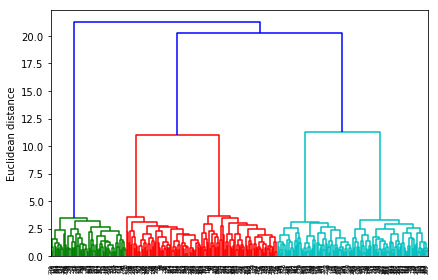

In [21]:
from scipy.cluster.hierarchy import dendrogram

row_dendr = dendrogram(row_clusters)

plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

In [46]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=5, 
                             affinity='euclidean', 
                             linkage='complete')
labels = ac.fit_predict(Data)
print('Cluster labels: %s' % labels)

Cluster labels: [3 4 3 1 0 3 3 4 1 3 2 4 2 2 4 1 1 4 1 0 0 3 4 2 4 4 3 1 4 0 0 1 1 2 4 4 4
 0 2 3 2 0 3 4 4 2 1 0 4 1 3 0 4 1 3 0 1 2 2 0 1 0 3 0 0 1 1 1 3 3 4 3 1 3
 3 4 3 3 0 0 2 4 1 0 0 1 1 4 2 1 0 4 2 4 2 3 1 2 1 3 4 2 2 4 1 3 3 0 3 3 0
 3 2 2 0 0 4 4 0 1 0 3 1 1 3 2 2 3 4 4 3 4 1 0 4 3 1 3 1 4 1 4 0 3 1 4 3 2
 4 4 0 2 4 2 2 0 1 4 2 0 0 4 4 1 3 2 0 1 2 2 2 2 0 2 4 4 1 2 4 2 1 1 2 1 2
 2 2 3 0 0 1 1 0 0 2 2 2 3 0 1 4 0 2 3 0 0 3 0 4 0 0 4 3 2 0 3 4 4 4 1 2 2
 2 1 2 0 0 2 0 4 3 2 4 3 0 2 3 0 0 4 3 0 0 3 0 3 1 2 0 4 1 0 0 1 2 4 1 4 1
 3 3 4 1 4 2 4 3 0 2 1 3 1 0 3 1 3 1 3 3 4 2 3 0 4 2 3 1 3 2 2 1 2 0 1 4 4
 0 1 2 4 1 1 1 1 4 3 2 0 1 0 3 2 1 4 1 3 3 0 1 2 4 3 3 2 3 4 0 3 2 2]


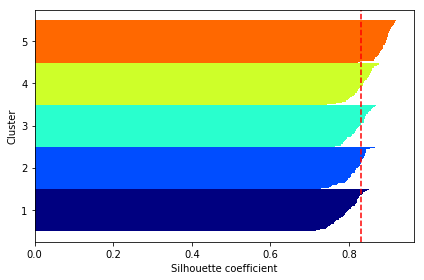

In [47]:
# Силуэты иерархической модели с 5 кластерами

import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt

cluster_labels = np.unique(labels)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(Data, labels, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks=[]
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[labels == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
            edgecolor ='none', color=color)
    
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()

plt.show()

In [103]:
# Метод кластеризации на основе плотности.

# В качестве параметра eps перебиралось несколько вариантов значений. Выбор был остановлен на значении 1,6,
# поскольку это является минимальным значением растояния, при котором все наблюдения кластеризуются.

from sklearn.cluster import DBSCAN

db = DBSCAN(eps=1.6, min_samples=5, metric='euclidean')
y_db = db.fit_predict(Data)

y_db

# Была получена модель с 5 кластерами, все наблюдения были охвачены и кластеризованы.

array([0, 1, 0, 3, 2, 0, 0, 1, 3, 0, 4, 1, 4, 4, 1, 3, 3, 1, 3, 2, 2, 0,
       1, 4, 1, 1, 0, 3, 1, 2, 2, 3, 3, 4, 1, 1, 1, 2, 4, 0, 4, 2, 0, 1,
       1, 4, 3, 2, 1, 3, 0, 2, 1, 3, 0, 2, 3, 4, 4, 2, 3, 2, 0, 2, 2, 3,
       3, 3, 0, 0, 1, 0, 3, 0, 0, 1, 0, 0, 2, 2, 4, 1, 3, 2, 2, 3, 3, 1,
       4, 3, 2, 1, 4, 1, 4, 0, 3, 4, 3, 0, 1, 4, 4, 1, 3, 0, 0, 2, 0, 0,
       2, 0, 4, 4, 2, 2, 1, 1, 2, 3, 2, 0, 3, 3, 0, 4, 4, 0, 1, 1, 0, 1,
       3, 2, 1, 0, 3, 0, 3, 1, 3, 1, 2, 0, 3, 1, 0, 4, 1, 1, 2, 4, 1, 4,
       4, 2, 3, 1, 4, 2, 2, 1, 1, 3, 0, 4, 2, 3, 4, 4, 4, 4, 2, 4, 1, 1,
       3, 4, 1, 4, 3, 3, 4, 3, 4, 4, 4, 0, 2, 2, 3, 3, 2, 2, 4, 4, 4, 0,
       2, 3, 1, 2, 4, 0, 2, 2, 0, 2, 1, 2, 2, 1, 0, 4, 2, 0, 1, 1, 1, 3,
       4, 4, 4, 3, 4, 2, 2, 4, 2, 1, 0, 4, 1, 0, 2, 4, 0, 2, 2, 1, 0, 2,
       2, 0, 2, 0, 3, 4, 2, 1, 3, 2, 2, 3, 4, 1, 3, 1, 3, 0, 0, 1, 3, 1,
       4, 1, 0, 2, 4, 3, 0, 3, 2, 0, 3, 0, 3, 0, 0, 1, 4, 0, 2, 1, 4, 0,
       3, 0, 4, 4, 3, 4, 2, 3, 1, 1, 2, 3, 4, 1, 3,